In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data = pd.read_csv('PlayTennis.csv')
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
outlook_encoder = OrdinalEncoder()
data['Outlook'] = outlook_encoder.fit_transform(data[['Outlook']])
temp_encoder = OrdinalEncoder()
data['Temperature'] = temp_encoder.fit_transform(data[['Temperature']])
humidity_encoder = OrdinalEncoder()
data['Humidity'] = humidity_encoder.fit_transform(data[['Humidity']])
windy_encoder = OrdinalEncoder()
data['Wind'] = windy_encoder.fit_transform(data[['Wind']])
play_encoder = OrdinalEncoder()
data['Play Tennis'] = play_encoder.fit_transform(data[['Play Tennis']])

In [7]:
x = data.drop(['Play Tennis'], axis=1)
y = data['Play Tennis']

In [10]:
x

,Outlook,Temperature,Humidity,Wind
0,2.0,1.0,0.0,1.0
1,2.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0
3,1.0,2.0,0.0,1.0
4,1.0,0.0,1.0,1.0
5,1.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0
7,2.0,2.0,0.0,1.0
8,2.0,0.0,1.0,1.0
9,1.0,2.0,1.0,1.0


In [11]:
y

0     0.0
1     0.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    0.0
Name: Play Tennis, dtype: float64

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
clf1 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf1.fit(x_train,y_train)
y_pred1 = clf1.predict(x_test)

In [21]:
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf2.fit(x_train,y_train)
y_pred2 = clf2.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy with Gini: ", accuracy_score(y_test,y_pred1))
print("Gini: ", classification_report(y_test,y_pred1))
print("cm", confusion_matrix(y_test,y_pred1))

Accuracy with Gini:  1.0
Gini:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

cm [[1 0]
 [0 2]]


In [25]:
print("Accuracy with Gini: ", accuracy_score(y_test,y_pred2))
print("Gini: ", classification_report(y_test,y_pred2))
print("cm", confusion_matrix(y_test,y_pred2))

Accuracy with Gini:  1.0
Gini:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

cm [[1 0]
 [0 2]]


[Text(0.4, 0.9, 'Outlook <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Yes'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'Humidity <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = No'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'Wind <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.3, 0.3, 'Outlook <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.8, 0.5, 'Wind <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Yes'),
 Text(0.7, 0.3, 'Outlook <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue =

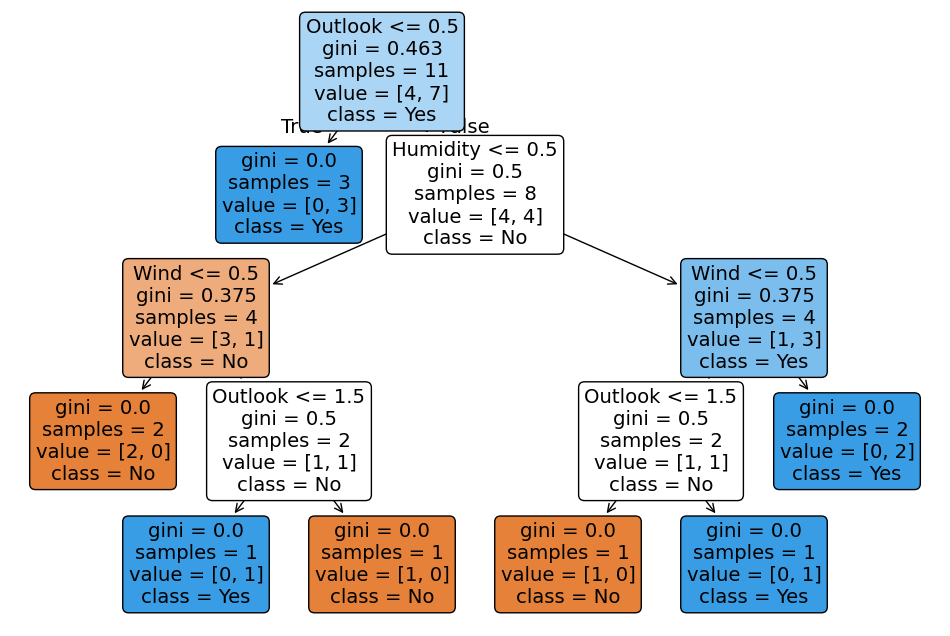

In [26]:
from sklearn import tree  
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=x.columns, class_names=play_encoder.categories_[0], rounded = True)